In [1]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
import mdtraj as md

In [2]:
u = md.load("/Scr/arango/membrane_AA/sepehr_build_fep/simulating_phthalates/MBP.H12/1.00.dcd", top="/Scr/arango/membrane_AA/sepehr_build_fep/simulating_phthalates/MBP.H12/1.psf")
traj = u.topology
prot = traj.select('protein')


In [3]:
protein = u.atom_slice(prot)
protein

<mdtraj.Trajectory with 6155 frames, 4436 atoms, 272 residues, and unitcells at 0x7fbfe295f710>

In [4]:
sasa = md.shrake_rupley(protein)
rofg = md.compute_rg(protein)
# print(prot)
print(sasa)
#print('sasa data shape', sasa.shape)
#print('sasa data shape', rofg.shape)

[[0.0000000e+00 1.9113448e-01 8.8488188e-04 ... 3.7738383e-02
  2.9353511e-01 3.3817926e-01]
 [1.1391548e-03 1.9838268e-01 9.7337790e-02 ... 3.4012020e-02
  2.0569059e-01 3.4525332e-01]
 [1.2976736e-06 1.9219491e-01 8.6132444e-05 ... 2.5201708e-02
  2.4354005e-01 3.6423495e-01]
 ...
 [1.1391563e-03 2.0814864e-01 1.8682029e-02 ... 4.2770173e-02
  1.9543658e-01 2.8155732e-01]
 [1.2976753e-06 2.0813143e-01 8.6734958e-02 ... 4.9113702e-02
  2.2901927e-01 1.2866610e-01]
 [4.5566205e-03 1.9397330e-01 1.4696714e-01 ... 3.9058112e-02
  2.8374580e-01 2.3787357e-01]]


In [5]:
total_sasa = sasa.sum(axis=1)
print(total_sasa.shape)


(6155,)


In [66]:
def fracdim(sasa, lenght, scaling):
    s = np.sqrt(sasa)
    a = np.sqrt(scaling)
    d = np.divide(s, a)
    i = np.divide(d, lenght)
    return np.power(i, 3)

In [53]:
def fracdimlog(sasa, lenght, scaling):
    s = np.sqrt(sasa)
    a = np.sqrt(scaling)
    d = np.power(np.divide(s, a), 3)
    i = np.power(lenght, 3)
    
    return np.log(np.divide(d, i))

In [54]:
def fracdimlog2(sasa, lenght, scaling):
    s = np.sqrt(sasa)
    a = np.sqrt(scaling)
    d = np.log(np.divide(s, a))
    i = np.log(lenght)
    
    return np.divide(d, i)

In [55]:
def mass (r, d):
    return np.power(r, d)

In [60]:
#d =  fracdim(total_sasa, rofg, 4*np.pi)
l =  fracdimlog(total_sasa, rofg, 4*np.pi)
l2 =  fracdimlog2(total_sasa, rofg, 4*np.pi)
#x = np.var(d)
y = np.var(l) 
z = np.var(l2)
#print(x, y, z)

0.001836975316558508
0.002498570360148827
0.0008912811401680222


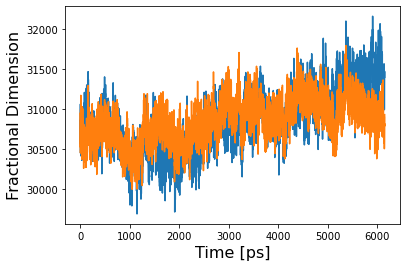

In [67]:
from matplotlib.pylab import *

#plot(u.time, total_sasa)
#plot(u.time, rofg)
#plot(u.time, d)
#plot(u.time, 6210*mass(rofg, d))
m = mass(rofg, 1.863)
#mx = mass(rofg, d)
#ml=mass(rofg, l)
ml2=mass(rofg, l2)
print(np.var(m))
print(np.var(ml))
print(np.var(ml2))
#ml2= np.power(ml2, 3)
plot(u.time, 9000*m)
#plot(u.time, ml)
plot(u.time, 9000*ml2)
#plot(u.time, 1.5*ml2-m)

#plot(u.time, ml-m)
#plot(u.time, l2)
xlabel('Time [ps]', size=16)
ylabel('Fractional Dimension', size=16)
show()

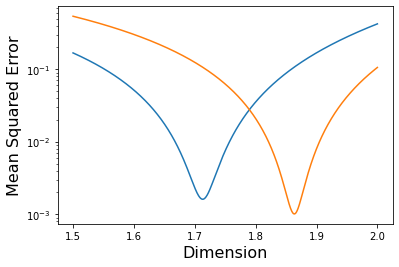

In [357]:
mx = 6210*mass(rofg, d)
ml=mass(rofg, l)
ml2=mass(rofg, l2)
#plot(u.time, m)
#plot(u.time, 1.45*ml2)
#plot(u.time, 1.5*ml2-m)
#ml2= np.power(ml2, 3)
#ml= np.power(ml, 3)
def fr (x):
    a = ml-mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s/(len(a))
def fr2 (x):
    a = ml2-mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s/(len(a))
def frd (x):
    a = mx-6210*mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s
ran =  list(range(0, 40)) 
ran2=np.linspace(1.5,2,1000)
semilogy(ran2, list(map(lambda pdb: fr(pdb), ran2))[0:len(ran2)])
semilogy(ran2, list(map(lambda pdb: fr2(pdb), ran2))[0:len(ran2)])
#semilogy(ran, list(map(lambda pdb: frd(pdb), ran)))
#plot(u.time, l2)
xlabel('Dimension', size=16)
ylabel('Mean Squared Error', size=16)
show()

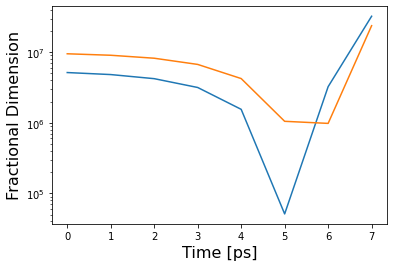

In [291]:
mx = 6210*mass(rofg, d)
ml=mass(rofg, l)
ml2=mass(rofg, l2)
#plot(u.time, m)
#plot(u.time, 1.45*ml2)
#plot(u.time, 1.5*ml2-m)
ml2= np.power(ml2, 3)
ml= np.power(ml, 3)
def fr (x):
    a = ml-mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s
def fr2 (x):
    a = ml2-mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s
def frd (x):
    a = mx-6210*mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s
ran =  list(range(0, 8)) 
semilogy(ran, list(map(lambda pdb: fr(pdb), ran)))
semilogy(ran, list(map(lambda pdb: fr2(pdb), ran)))
#semilogy(ran, list(map(lambda pdb: frd(pdb), ran)))
#plot(u.time, l2)
xlabel('Time [ps]', size=16)
ylabel('Fractional Dimension', size=16)
show()

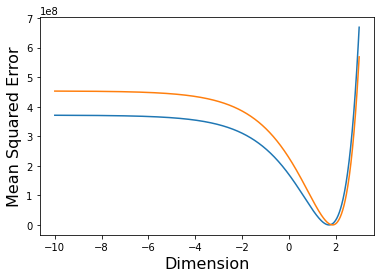

In [344]:
mx = 6210*mass(rofg, d)
ml=mass(rofg, l)
ml2=mass(rofg, l2)
#plot(u.time, m)
#plot(u.time, 1.45*ml2)
#plot(u.time, 1.5*ml2-m)
#ml2= np.power(ml2, 3)
#ml= np.power(ml, 3)
def fr (x):
    a = 6210*ml-6210*mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s/(len(a))
def fr2 (x):
    a = 6210*ml2-6210*mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s/(len(a))
def frd (x):
    a = mx-6210*mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s/(len(a))
ran =  list(range(0, 40)) 
ran2=np.linspace(-10,3,1000)
plot(ran2, list(map(lambda pdb: fr(pdb), ran2))[0:len(ran2)])
plot(ran2, list(map(lambda pdb: fr2(pdb), ran2))[0:len(ran2)])
#plot(ran2, list(map(lambda pdb: frd(pdb), ran2))[0:len(ran2)])
#semilogy(ran, list(map(lambda pdb: frd(pdb), ran)))
#plot(u.time, l2)
xlabel('Dimension', size=16)
ylabel('Mean Squared Error', size=16)
show()

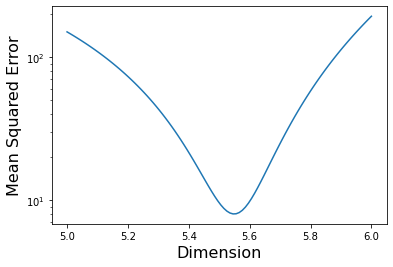

In [327]:
mx = mass(rofg, d)

#plot(u.time, m)
#plot(u.time, 1.45*ml2)
#plot(u.time, 1.5*ml2-m)
#ml2= np.power(ml2, 3)
#ml= np.power(ml, 3)

def frd (x):
    a = mx-mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s/(len(a))
ran =  list(range(0, 40)) 
ran2=np.linspace(5,6,100)

semilogy(ran2, list(map(lambda pdb: frd(pdb), ran2))[0:len(ran2)])
#semilogy(ran, list(map(lambda pdb: frd(pdb), ran)))
#plot(u.time, l2)
xlabel('Dimension', size=16)
ylabel('Mean Squared Error', size=16)
show()

[3.03978487 3.09403534 3.12612691 ... 3.08722955 3.07868981 3.1089117 ]


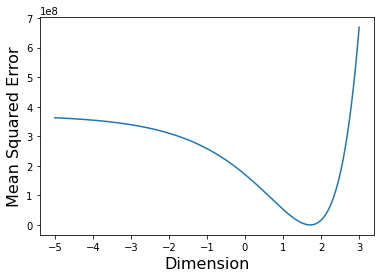

In [698]:
mx = mass(rofg, d)
ml=mass(rofg, l)
ml2=mass(rofg, l2)
print(ml)
#plot(u.time, m)
#plot(u.time, 1.45*ml2)
#plot(u.time, 1.5*ml2-m)
#ml2= np.power(ml2, 3)
#ml= np.power(ml, 3)
def fr (x):
    a = 6210*ml-6210*mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s/(len(a))
def fr2 (x):
    a = 6210*ml2-6210*mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s/(len(a))
def frd (x):
    a = mx-mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s/(len(a))
def d_fun(x):
    h = 1e-5
    return (fr2(x+h)-fr2(x-h))/(2*h)
ran =  list(range(0, 40)) 
ran2=np.linspace(-5,3,1000)
plot(ran2, list(map(lambda pdb: fr(pdb), ran2))[0:len(ran2)])
#semilogx(ran2, list(map(lambda pdb: d_fun(pdb), ran2))[0:len(ran2)])
#plot(ran2, list(map(lambda pdb: frd(pdb), ran2))[0:len(ran2)])
#semilogy(ran, list(map(lambda pdb: frd(pdb), ran)))
#plot(u.time, l2)
xlabel('Dimension', size=16)
ylabel('Mean Squared Error', size=16)

show()

# MISTAKE WAS MADE ON THE VOLUME RATIOS!

I thought that taking the ratio of the small SASA volume to the larger Rg would yield D_f.

It makes more send for the inverse being the case, however I have no justification for this.

2022-10-25
Maybe it wasn't a mistake, since the smaller protein has more surface area, thus larger sphere...

In [686]:
def fracdimlog3(sasa, lenght, scaling):
    s = np.sqrt(sasa)
    a = np.sqrt(scaling)
    d = np.log(np.divide(s, a))
    i = np.log(lenght)
    
    return np.divide(i, d)

[1.42680585 1.42687967 1.41704863 ... 1.43987762 1.44332822 1.43960294]


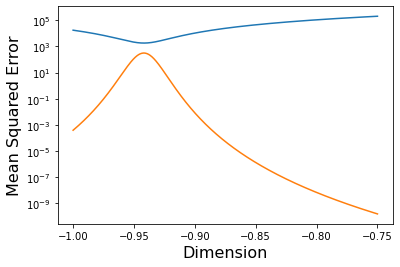

In [693]:
l =  fracdimlog3(total_sasa, rofg, 4*np.pi)

mx = mass(rofg, d)
ml=mass(rofg, l)
ml2=mass(rofg, l2)
print(ml)
#plot(u.time, m)
#plot(u.time, 1.45*ml2)
#plot(u.time, 1.5*ml2-m)
#ml2= np.power(ml2, 3)
#ml= np.power(ml, 3)
def fr (x):
    a = 6210*l-6210*mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s/(len(a))
def fr2 (x):
    a = 6210*ml2-6210*mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s/(len(a))
def frd (x):
    a = mx-mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s/(len(a))
def d_fun(x):
    h = 1e-5
    return (fr2(x+h)-fr2(x-h))/(2*h)
ran =  list(range(0, 40)) 
ran2=np.linspace(-1,-.75,1000)
x = list(map(lambda pdb: fr(pdb), ran2))[0:len(ran2)]
semilogy(ran2, np.multiply(1,x))
#semilogx(ran2, list(map(lambda pdb: d_fun(pdb), ran2))[0:len(ran2)])
#plot(ran2, list(map(lambda pdb: frd(pdb), ran2))[0:len(ran2)])
#semilogy(ran, list(map(lambda pdb: frd(pdb), ran)))
#plot(u.time, l2)

def func(x):
  f=-4*(  2*(np.power(np.divide(300,x),12) -  2*np.power(np.divide(3000,x),6) ))
  return f
semilogy(ran2, func(x))
#print(func(x))
#print(x)
xlabel('Dimension', size=16)
ylabel('Mean Squared Error', size=16)

show()

In [682]:
def fracdimlog3(sasa, lenght, scaling):
    s = np.sqrt(sasa)
    a = np.sqrt(scaling)
    d = np.log(np.divide(s, a))
    i = np.log(lenght)
    
    return np.divide(i, d)

[1.42680585 1.42687967 1.41704863 ... 1.43987762 1.44332822 1.43960294]


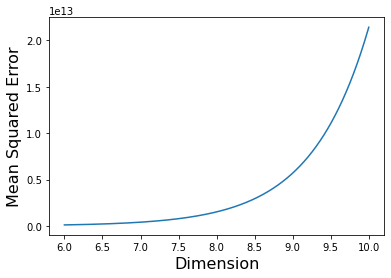

In [683]:
l =  fracdimlog3(total_sasa, rofg, 4*np.pi)

mx = mass(rofg, d)
ml=mass(rofg, l)
ml2=mass(rofg, l2)
print(ml)
#plot(u.time, m)
#plot(u.time, 1.45*ml2)
#plot(u.time, 1.5*ml2-m)
#ml2= np.power(ml2, 3)
#ml= np.power(ml, 3)
def fr (x):
    a = 6210*l-6210*mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s/(len(a))
def fr2 (x):
    a = 6210*ml2-6210*mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s/(len(a))
def frd (x):
    a = mx-mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s/(len(a))
def d_fun(x):
    h = 1e-5
    return (fr2(x+h)-fr2(x-h))/(2*h)
ran =  list(range(0, 40)) 
ran2=np.linspace(6,10,1000)
x = list(map(lambda pdb: fr(pdb), ran2))[0:len(ran2)]
plot(ran2, np.multiply(1,x))
#semilogx(ran2, list(map(lambda pdb: d_fun(pdb), ran2))[0:len(ran2)])
#plot(ran2, list(map(lambda pdb: frd(pdb), ran2))[0:len(ran2)])
#semilogy(ran, list(map(lambda pdb: frd(pdb), ran)))
#plot(u.time, l2)

def func(x):
  f=-4*(  2*(np.power(np.divide(300,x),12) -  2*np.power(np.divide(3000,x),6) ))
  return f
#plot(ran2, func(x))
#print(func(x))
#print(x)
xlabel('Dimension', size=16)
ylabel('Mean Squared Error', size=16)

show()

[1.42680585 1.42687967 1.41704863 ... 1.43987762 1.44332822 1.43960294]


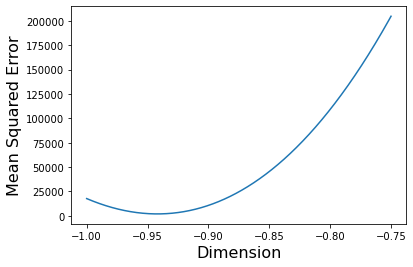

In [695]:
l =  fracdimlog3(total_sasa, rofg, 4*np.pi)

mx = mass(rofg, d)
ml=mass(rofg, l)
ml2=mass(rofg, l2)
print(ml)
#plot(u.time, m)
#plot(u.time, 1.45*ml2)
#plot(u.time, 1.5*ml2-m)
#ml2= np.power(ml2, 3)
#ml= np.power(ml, 3)
def fr (x):
    a = 6210*l-6210*mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s/(len(a))
def fr2 (x):
    a = 6210*ml2-6210*mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s/(len(a))
def frd (x):
    a = mx-mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s/(len(a))
def d_fun(x):
    h = 1e-5
    return (fr2(x+h)-fr2(x-h))/(2*h)
ran =  list(range(0, 40)) 
ran2=np.linspace(-1,-.75,1000)
x = list(map(lambda pdb: fr(pdb), ran2))[0:len(ran2)]
plot(ran2, np.multiply(1,x))
#semilogx(ran2, list(map(lambda pdb: d_fun(pdb), ran2))[0:len(ran2)])
#plot(ran2, list(map(lambda pdb: frd(pdb), ran2))[0:len(ran2)])
#semilogy(ran, list(map(lambda pdb: frd(pdb), ran)))
#plot(u.time, l2)

def lj_force(r, epsilon, sigma):
    """
    Implementation of the Lennard-Jones potential 
    to calculate the force of the interaction.
    
    Parameters
    ----------
    r: float
        Distance between two particles (Å)
    epsilon: float 
        Potential energy at the equilibrium bond 
        length (eV)
    sigma: float 
        Distance at which the potential energy is 
        zero (Å)
    
    Returns
    -------
    float
        Force of the van der Waals interaction (eV/Å)
    """
    return 48 * epsilon * np.power(
        sigma, 12) / np.power(
        r, 13) - 24 * epsilon * np.power(
        sigma, 6) / np.power(r, 7)
    
r = np.linspace(3.5, 8, 100)
#plot(r, lj_force(r, 0.0103, 3.4))
#print(func(x))
#print(x)
xlabel('Dimension', size=16)
ylabel('Mean Squared Error', size=16)

show()

/Projects/arango/anaconda3/lib/python3.6/site-packages/ipykernel/pylab/backend_inline.py:231: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


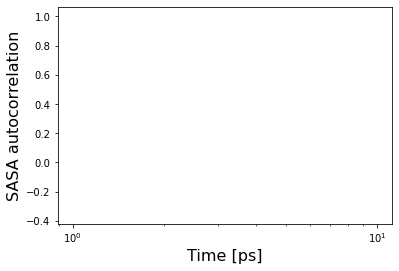

In [669]:
def autocorr(x):
    "Compute an autocorrelation with numpy"
    x = x - np.mean(x)
    result = np.correlate(x, x, mode='full')
    result = result[result.size//2:]
    return result / result[0]

semilogx(ran2, autocorr(x))
xlabel('Time [ps]', size=16)
ylabel('SASA autocorrelation', size=16)
show()

# Rewriting the equations

We first take the radius of gyration $R_{g}$ and the SASA of our protein.

Then we use the area obtained from SASA calculation to make a sphere with a radius $R_{SASA}$: 

$$ SASA = 4\pi R_{SASA}^{2}$$

$$ R_{SASA} = \sqrt{\frac{SASA}{4\pi}}$$

The fractional dimension, or simply the fractal dimension, $D_{f}$ is then obtained the ratio of the logarithms between $R_{SASA}$ and $R_{g}$:

$$D_{f} = \frac{log R_{SASA}}{log R_{g}} $$

We then note the relationship between mass, radius of gyration, and dimension:

$$R_{g}^{D} \propto m$$

Calculating $m$ for every frame yields masses within the same order of magnitude. However we can identify a representative fractal dimension identifying the minimum of the mean squared errror (MSE) between our SASA based mass, $m_{f}$, and a secondary mass, $m_{i}$ of varying dimension:

$$\frac{1}{N}\sum_{i=1}^{N} \left ( {m_{f}} - {m_{i}} \right )^{2}$$

We can also expand our expression to show the indiviual contributions from variable dimensions:

$$\frac{1}{N}\sum_{j=1}^{N} \left ( R_{g_{j}}^{D_{f_{j}}} - R_{g_{j}}^{D_{i}} \right )^{2}$$

Ommiting the MSE, we can further expand the expression highlight the contributions from the SASA:

$$\left ( \frac{R_{g}^{log(SASA)}}{R_{g}^{log(\alpha)}} \right )^{\frac{1}{2log(R_{g})}} - R_{g}^{D_{i}}$$


$$ = R_{g}^{D_{f}} - R_{g}^{D_{i}}$$







In [7]:
def massfrac(sasa, l, scaling):
    s = np.log(sasa)
    a = np.log(scaling)
    i = np.divide(np.power(l, s), np.power(l, a))
    d = np.divide(1, np.multiply(2, np.log(l)))
        
    return np.power(i, d)



def mass (r, d):
    return np.power(r, d)

(6155,) (6155,) (6155,)


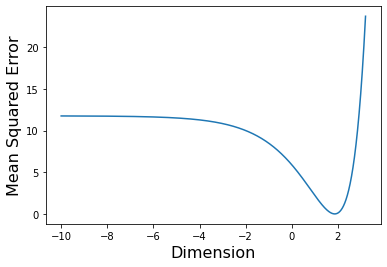

In [13]:
from matplotlib.pylab import *

mf = massfrac(total_sasa, rofg, 4*np.pi)
#mf = massfrac(total_sasa, rofg, 1)
def msxe (x):
    a = 6210*mf-6210*mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s/(len(a))

def mse (x):
    a = mf-mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s/(len(a))

def msie (x):
    a = mass(rofg, x)-mf
    s = np.sum(np.power(a,2))
    return s/(len(a))

# For scaling 4pi
di=np.linspace(-10,3.2,6155)
#di=np.linspace(1.86353,1.863535,6155)

# For scaling 1
#di=np.linspace(-10,4,1000)
print(rofg.shape, mf.shape, di.shape)


mserror = list(map(lambda d: mse(d), di))[0:len(di)]
mserrorx = list(map(lambda d: mse(d), -di))[0:len(di)]
plot(di, mserror)
#plot(di, mserrorx)

xlabel('Dimension', size=16)
ylabel('Mean Squared Error', size=16)

show()

(6155,) (6155,) (6155,)


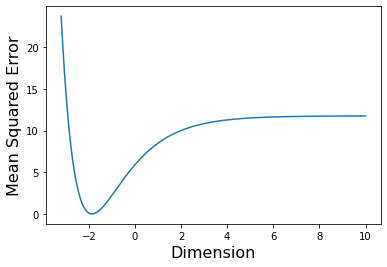

In [48]:
# For scaling 4pi
di=np.linspace(-3.2,10,6155)
#di=np.linspace(1.86353,1.863535,6155)

#di=np.linspace(-10,4,1000)
print(rofg.shape, mf.shape, di.shape)

mserrorx = list(map(lambda d: mse(d), -di))[0:len(di)]
plot(di, mserrorx)

xlabel('Dimension', size=16)
ylabel('Mean Squared Error', size=16)

show()

Text(0, 0.5, 'Mass from Df')

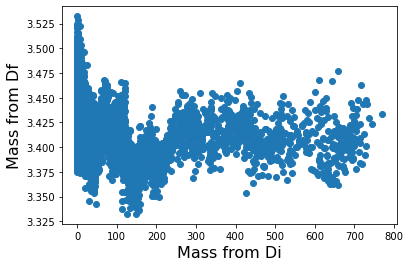

In [24]:
mi = mass(rofg, di)
scatter(mi,mf)
xlabel('Mass from Di', size=16)
ylabel('Mass from Df', size=16)

(6155,) (6155,) (6155,)


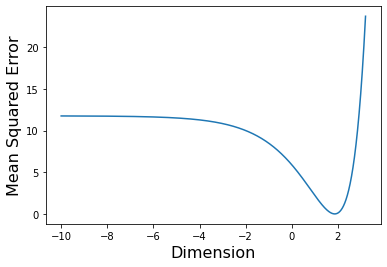

In [80]:
def msie (x):
    a = mf-mass(rofg, x)
    s = np.sum(np.power(a,2))
    return s/(len(a))

# For scaling 4pi
di=np.linspace(-10,3.2,6155)
#di=np.linspace(1.86353,1.863535,6155)

# For scaling 1
#di=np.linspace(-10,4,1000)
print(rofg.shape, mf.shape, di.shape)


mserror = list(map(lambda d: msie(d), di))[0:len(di)]
#mserrorx = list(map(lambda d: mse(d), -di))[0:len(di)]
plot(di, mserror)
#plot(di, mserrorx)

xlabel('Dimension', size=16)
ylabel('Mean Squared Error', size=16)

show()